In [1]:
import sys
sys.path.append('..')
import numpy as np
from src.data import jjt
from src.models.layers import MatMul, SoftmaxWithLoss
from src.common.util import preprocess, create_contexts_target, convert_one_hot, most_similar
from src.common.trainer import Trainer
from src.common.optimizer import Adam
from src.data import jjt

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| epoch 1 |  iter 1 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 21 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 41 / 119 | time 0[s] | loss 7.81
| epoch 1 |  iter 61 / 119 | time 0[s] | loss 7.80
| epoch 1 |  iter 81 / 119 | time 0[s] | loss 7.77
| epoch 1 |  iter 101 / 119 | time 0[s] | loss 7.74
| epoch 2 |  iter 1 / 119 | time 1[s] | loss 7.69
| epoch 2 |  iter 21 / 119 | time 1[s] | loss 7.61
| epoch 2 |  iter 41 / 119 | time 1[s] | loss 7.55
| epoch 2 |  iter 61 / 119 | time 1[s] | loss 7.47
| epoch 2 |  iter 81 / 119 | time 1[s] | loss 7.37
| epoch 2 |  iter 101 / 119 | time 1[s] | loss 7.26
| epoch 3 |  iter 1 / 119 | time 2[s] | loss 7.15
| epoch 3 |  iter 21 / 119 | time 2[s] | loss 7.00
| epoch 3 |  iter 41 / 119 | time 2[s] | loss 6.87
| epoch 3 |  iter 61 / 119 | time 2[s] | loss 6.70
| epoch 3 |  iter 81 / 119 | time 2[s] | loss 6.57
| epoch 3 |  iter 101 / 119 | time 2[s] | loss 6.37
| epoch 4 |  iter 1 / 119 | time 3[s] | loss 6.34
| epoch 4 |  iter 21 / 119 | tim

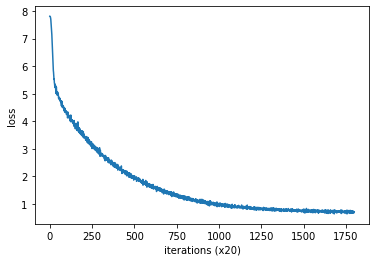

In [3]:
window_size = 1
hidden_size = 20
batch_size = 100
max_epoch = 300

#text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = jjt.load_data()

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [4]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

悪魔 [ 2.280306    0.7087559  -0.79333496  0.29331836 -0.48389018 -1.1634842
  0.16257697  0.44300023 -1.740876    0.78200924  3.1226408  -1.0420941
  0.39913312  0.5735214   0.9172655  -0.8057132  -0.12227271  1.7417886
  0.20687056 -2.0978708 ]
の [-2.8626194   0.3584236   0.34520456 -1.909955   -2.0917284   0.01163665
 -1.0699925   0.40385094 -1.1192902   3.0439365  -4.511616   -2.4093773
  3.9208455  -2.0208287  -3.1477354  -0.7944386  -0.7665643   1.6927085
  1.0177709   0.9404581 ]
笑い [-1.1279532   0.58175236 -2.3131185  -1.6390364   0.21440975  2.2038054
 -2.0353644   1.4699739  -3.0611734  -0.8706704  -0.9331814  -2.697161
  0.22988375  1.5237976   4.134538    1.6999568   1.4561539  -0.68393326
 -0.8448301   0.4659843 ]
方 [ 0.77132833 -1.1314338  -1.6012597   1.7772019  -0.732784   -0.7904583
  2.885094    2.1632092  -0.33780026 -0.88450336 -2.609242   -0.10221338
  2.3935385   0.9135645  -0.43494695 -1.3099593   0.1670007   1.8267474
 -0.0660826  -2.3517609 ]
せい [ 0.35480756  1.6

In [5]:
query = '奴'
most_similar(query, word_to_id, id_to_word, word_vecs)


[query] 奴
 無意味: 0.7353149056434631
 ポンコツ: 0.7050280570983887
 審判: 0.6809840798377991
 26: 0.6784063577651978
 ＯＢ: 0.6666905879974365
